#Preliminary Steps

In [94]:
#Import appropriate modules.
import pandas as pd
import numpy as np

In [95]:
#Load data.
df = pd.read_csv("/content/spotifytoptracks.csv")

#Data Cleaning

###Format DataFrame

In [39]:
#Clean column names.
df.columns = df.columns.str.strip()

In [ ]:
#Raw DataFrame has 50 rows and 17 columns.
df.shape

In [ ]:
#Some data validation.
#Check that the following columns have values between 0 and 1.
df = df[
    (df["energy"] >= 0.0) & (df["energy"] <= 1.0) &
    (df["danceability"] >= 0.0) & (df["danceability"] <= 1.0) &
    (df["acousticness"] >= 0.0) & (df["acousticness"] <= 1.0) &
    (df["speechiness"] >= 0.0) & (df["speechiness"] <= 1.0) &
    (df["instrumentalness"] >= 0.0) & (df["instrumentalness"] <= 1.0) &
    (df["liveness"] >= 0.0) & (df["liveness"] <= 1.0) &
    (df["valence"] >= 0.0) & (df["valence"] <= 1.0)
    ]

### Handle Missing Values

In [40]:
df.shape

(50, 17)

In [41]:
#Drop any rows with missing values.
df = df.dropna()

In [42]:
#No rows were dropped by this operation. Therefore no missing values in data.
df.shape

(50, 17)

###Remove Duplicates

In [43]:
#Remove any duplicate rows.
df = df.drop_duplicates()

In [44]:
#There were no duplicate rows.
df.shape

(50, 17)

###Treat Outliers

In [111]:
from scipy.stats import zscore

#Create df of only the numerical features.
numeric_cols = df.select_dtypes(include=[np.number]).columns

#Perform z score analysis.
z_score_df = df[numeric_cols].apply(zscore)

#Z-scores with a magnitude greater than 3 can be considered outliers.
z_score_df = z_score_df[abs(z_score_df) > 3]

#Create df joining the z score analysis to the appropriate song name.
result = pd.concat([df[["album", "artist", "track_name"]], z_score_df], axis=1, join="inner")

#Drop rows where none of the columns have an outlier.
result.dropna(subset=["energy",	"danceability",	"key",	"loudness",	"acousticness",	"speechiness",	"instrumentalness",	"liveness",	"valence",	"tempo",	"duration_ms"], how='all')

,album,artist,track_name,Unnamed: 0,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
2,Please Excuse Me For Being Antisocial,Roddy Ricch,The Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.394333,NaN,NaN,NaN
19,High Off Life,Future,Life Is Good (feat. Drake),NaN,NaN,NaN,NaN,NaN,NaN,3.137086,NaN,NaN,NaN,NaN,NaN
24,everything i wanted,Billie Eilish,everything i wanted,NaN,NaN,NaN,NaN,-3.537252,NaN,NaN,6.866026,NaN,NaN,NaN,NaN
41,Translation,Black Eyed Peas,RITMO (Bad Boys For Life),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.405773,NaN,NaN,NaN
49,ASTROWORLD,Travis Scott,SICKO MODE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.353633


There are a few songs with features with Z-scores having a magnitude greater than 3. For example, "everything i wanted" by Billie Eilish has a much higher instrumentalness than other songs.
I ultimately decided not to remove any of these songs with mathematical outliers as I don't fully understand what an "acousticness" score actually means. Just because a song has a particularly high score in one of these features does not mean the song is invalid data.

# EDA

##Data Shape

###How many observations are there in this dataset?

In [47]:
df.shape

(50, 17)

In our dataset, each observation represents a top Spotify song. Observations just mean rows and .shape has shown that our cleaned data has 50 rows.

###How many features this dataset has?

In [48]:
df.shape

(50, 17)

Features refer to columns. Again .shape can be used to answer this question. We can see that our dataset is 17 wide. However it must be born in mind that one of these is the index which is arbitrary. So our dataset has 16 features.

###Which of the features are categorical?

In [49]:
#Get datatype of each column.
df.dtypes

,0
Unnamed: 0,int64
artist,object
album,object
track_name,object
track_id,object
energy,float64
danceability,float64
key,int64
loudness,float64
acousticness,float64


Categorical data can be stored and identified by names or labels. Whereas numerical data are numbers, not words or descriptions.
The above cell shows that 5 of the columns have a data type of "object" which is not numerical.
Taking a look at these, "genre" for example is a clear example of categorical data.

###Which of the features are numeric?

As discussed above, 5 of the 16 features are caregorical.
The remaining 11 are numerical.

##Artists

###Are there any artists that have more than 1 popular track?

In [50]:
#Group by artist and count
popular_artists_df = df["artist"].value_counts()

#Filter out artists with only 1 count
popular_artists_df[popular_artists_df > 1]

,count
artist,
Billie Eilish,3
Dua Lipa,3
Travis Scott,3
Justin Bieber,2
Harry Styles,2
Lewis Capaldi,2
Post Malone,2


###Who was the most popular artist?

The above cell indicates that there was a three way tie between Billie Eilish, Dua Lipa, and Travis Scott.

###How many artists in total have their songs in the top 50?

In [51]:
df["artist"].nunique()

40

There are 40 unique artists who have songs in the top 50.

##Albums

###Are there any albums that have more than 1 popular track?

In [52]:
#Group by album and count
popular_albums_df = df["album"].value_counts()

#Filter out albums with only 1 count
popular_albums_df[popular_albums_df > 1]

,count
album,
Future Nostalgia,3
Hollywood's Bleeding,2
Fine Line,2
Changes,2


###How many albums in total have their songs in the top 50?

In [53]:
df["album"].nunique()

45

##Danceability, Loudness, Length

###Which tracks have a danceability score above 0.7?

In [54]:
df["track_name"][(df["danceability"] > 0.7)]

,track_name
1,Dance Monkey
2,The Box
3,Roses - Imanbek Remix
4,Don't Start Now
5,ROCKSTAR (feat. Roddy Ricch)
7,death bed (coffee for your head)
8,Falling
10,Tusa
13,Blueberry Faygo
14,Intentions (feat. Quavo)


###Which tracks have a danceability score below 0.4?

In [55]:
df["track_name"][(df["danceability"] < 0.4)]

,track_name
44,lovely (with Khalid)


###Which tracks have their loudness above -5?

In [56]:
df["track_name"][(df["loudness"] > -5.0)]

,track_name
4,Don't Start Now
6,Watermelon Sugar
10,Tusa
12,Circles
16,Before You Go
17,Say So
21,Adore You
23,Mood (feat. iann dior)
31,Break My Heart
32,Dynamite


###Which tracks have their loudness below -8?

In [57]:
df["track_name"][(df["loudness"] < -8.0)]

,track_name
7,death bed (coffee for your head)
8,Falling
15,Toosie Slide
20,Savage Love (Laxed - Siren Beat)
24,everything i wanted
26,bad guy
36,HIGHEST IN THE ROOM
44,lovely (with Khalid)
47,If the World Was Ending - feat. Julia Michaels


###Which track is the longest?

In [58]:
#The expression df['duration_ms'].idxmax() returns the index number 49
#This index number is then put into iloc.
df["track_name"].iloc[df['duration_ms'].idxmax()]

'SICKO MODE'

###Which track is the shortest?

In [59]:
df["track_name"].iloc[df['duration_ms'].idxmin()]

'Mood (feat. iann dior)'

##Genre

###Which genre is the most popular?

In [60]:
#Group by genre and count
popular_genres_df = df["genre"].value_counts()

#Find genre with max count
popular_genres_df.idxmax()

'Pop'

###Which genres have just one song on the top 50?

In [61]:
#Filter out genres with more than 1 count
popular_genres_df[popular_genres_df == 1]

,count
genre,
Nu-disco,1
R&B/Hip-Hop alternative,1
Pop/Soft Rock,1
Pop rap,1
Hip-Hop/Trap,1
Dance-pop/Disco,1
Disco-pop,1
Dreampop/Hip-Hop/R&B,1
Alternative/reggaeton/experimental,1


###How many genres in total are represented in the top 50?

In [ ]:
df["genre"].nunique()

16

##Correlations

###Which features are strongly positively correlated?

In [62]:
#Make DF of all columns with a ratio scale or interval scale.
correlation_features = df[["energy", "danceability", "loudness", "acousticness",
                           "speechiness", "instrumentalness", "liveness",
                           "valence", "tempo", "duration_ms"]]

In [63]:
#Create correlation matrix.
correlation_matrix = correlation_features.corr()
correlation_matrix

,energy,danceability,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
loudness,0.791640,0.167147,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328
duration_ms,0.081971,-0.033763,0.064130,-0.010988,0.366976,0.184709,-0.090188,-0.039794,0.130328,1.000000


<Axes: >

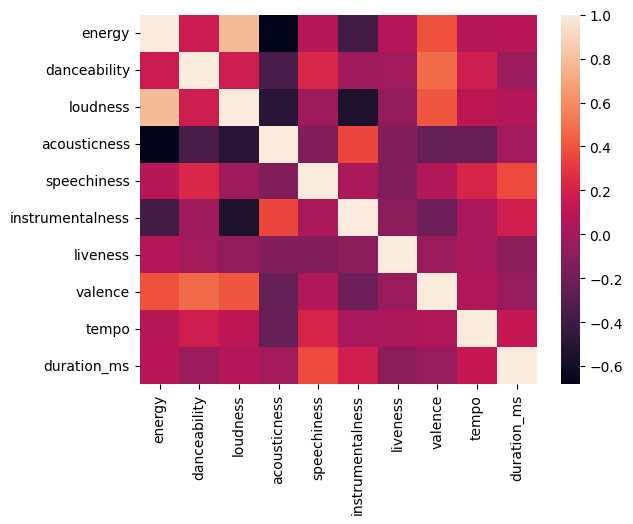

In [66]:
import seaborn as sns

#Plot heatmap.
sns.heatmap(correlation_matrix)

<Axes: >

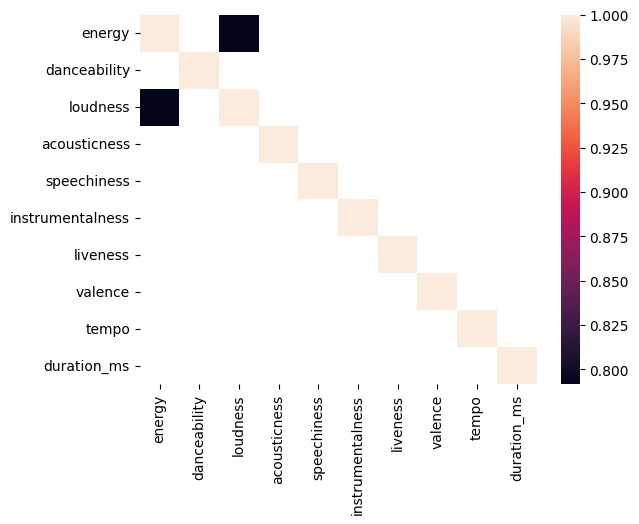

In [67]:
#Correlation coefficients with a magnitude of 0.7 or more can be considered strong correlations.
sns.heatmap(correlation_matrix[correlation_matrix >= 0.7])

It can be said that there is a strong correlation between energy and loudness.

###Which features are strongly negatively correlated?

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

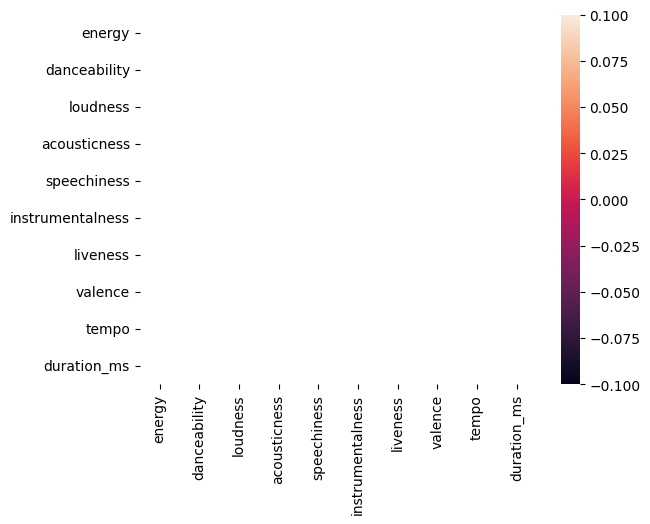

In [68]:
sns.heatmap(correlation_matrix[correlation_matrix <= -0.7])

There are no features that are strongly negatively correlated.

###Which features are not correlated?

<Axes: >

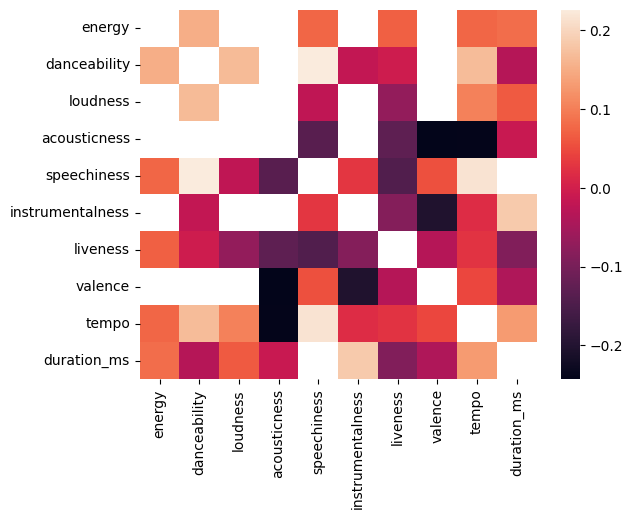

In [69]:
sns.heatmap(correlation_matrix[(correlation_matrix >= -0.3) & (correlation_matrix <= 0.3)])

There are many relationships which do not seem to have a correlation.
Speechiness seems to have no correlation with anything except the duration of the song and vice versa.
Tempo has no correlation with anything.
Same for liveness.

###How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
#Group by genre and average their danceability.
danceability_df = df.groupby("genre")["danceability"].mean().reset_index()

#Filter genres of interest.
danceability_df[danceability_df["genre"].isin(["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"])]

,genre,danceability
1,Alternative/Indie,0.661750
5,Dance/Electronic,0.755000
8,Hip-Hop/Rap,0.765538
11,Pop,0.677571


###How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
#Group by genre and average their loudness.
loudness_df = df.groupby("genre")["loudness"].mean().reset_index()
loudness_df[loudness_df["genre"].isin(["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"])]

,genre,loudness
1,Alternative/Indie,-5.421000
5,Dance/Electronic,-5.338000
8,Hip-Hop/Rap,-6.917846
11,Pop,-6.460357


###How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
#Group by genre and average their acousticness.
acousticness_df = df.groupby("genre")["acousticness"].mean().reset_index()
acousticness_df[acousticness_df["genre"].isin(["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"])]

,genre,acousticness
1,Alternative/Indie,0.583500
5,Dance/Electronic,0.099440
8,Hip-Hop/Rap,0.188741
11,Pop,0.323843


##Suggestions on how this analysis can be improved.

Other ways to analyse this data include:
- Calculate mean, median, mode, standard deviation, and range for numerical features.
- Plot histograms for numerical features to understand their distributions.
- Compare average feature values across different genres using bar charts.
- Create scatter plots to explore relationships between features (e.g., energy vs. loudness).
- Use pair plots to visualize multiple feature relationships simultaneously.